<br>

# MACHINE LEARNING AND STATISTICS PROJECT 2020

In this notebook I am am creating my project for the Machine Learning and Statistics 2020 module.

Find in markdown cells below a description of the project( instructions for the project to be deleted before last commit), references and the code explained with markdown cells, plus commented code cells explaining what is being done. 

***
References

- [Fundamentals DA project's repository ](https://github.com/Ainara12/Fundamentals-Project/blob/master/Fundamentals%20DA-Project.ipynb)

- [Introduction to Linear and Polynomial Regression](https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb)

- [Numpy polyfit function documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

- [Numpy poly1d function documentation](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html)

- [Lecturer's simple linear regression Jupyter notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb)

- [Machine Learning Polynomial Regression](https://www.w3schools.com/python/python_ml_polynomial_regression.asp)

- [Introduction to Keras](https://keras.io/getting_started/intro_to_keras_for_engineers/)

- [Lecturer's linear regression in Keras Jupyter notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb)

- [Neural network with Keras tutorial](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

- [Classification and regression using Keras tutorial](https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/)
 
- [Linear regression using Python Sklearn video tutorial](https://www.youtube.com/watch?v=b0L47BeklTE&ab_channel=RylanFowers)
 
 
 
 ***

<br>

## Project instructions

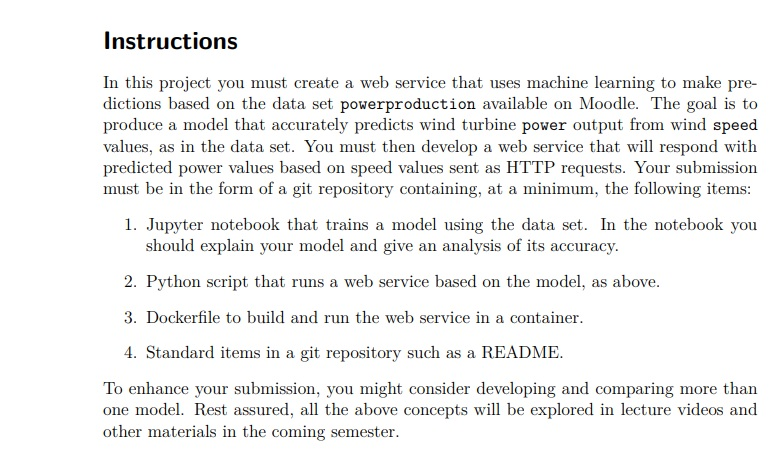

<br>

## Overall purpose of this project

My goal with this project is , following instructions above, use machine learning to make predictions using the 'powerproduction' dataset. I have some works done for this in my project for the module Fundamentals of Data Analysis  that I will use as reference to create a model that predicts output wind turbine power from wind speed values.Once this model is complete I will create a script that runs a web service based on this model and a Dockerfile to build and run the web service in a container. 

To achieve this goal I am using the information and knowledge gathered during the course of this module along with the references consulted and detailed in this document. 


<br>

## Dataset analysis

### Loading and observing raw dataset

Before we get into create a prediction model, I am looking into the raw dataset to get a feel into how it looks and see some descriptive statistics. See works in code cells below:


In [1]:
#Importing the modules I am going to use

import pandas as pd #to load and organize dataset
import matplotlib.pyplot as plt #for visualisation
import numpy as np #to work with arrays and apply regression functions

#loading dataset

data=pd.read_csv(r'C:\Users\fainl\OneDrive\Documents\GMITSEP2020\Machine Learning -Project\Powerproduction dataset.csv', header=0) 

#converting this dataset into dataframe with pandas 

powerdata=pd.DataFrame (data, columns = ['speed','power'])

powerdata=powerdata.iloc[1:]

print(powerdata)


      speed  power
1     0.125  0.000
2     0.150  0.000
3     0.225  0.000
4     0.275  0.000
5     0.325  4.331
..      ...    ...
495  24.775  0.000
496  24.850  0.000
497  24.875  0.000
498  24.950  0.000
499  25.000  0.000

[499 rows x 2 columns]


In [2]:
#initially describing dataset using pandas functionalities

powerdata.describe()

,speed,power
count,499.000000,499.000000
mean,12.615629,48.110806
std,7.210158,41.600619
min,0.125000,0.000000
25%,6.381000,5.323500
50%,12.563000,41.692000
75%,18.781500,93.547000
max,25.000000,113.556000


<br>

The code cells above show us the structure of this dataset. This dataset is based on a real life scenario in which we have 499 rows ( initially 500 but I dropped first row as had no information on it) and two columns for wind speed and power generated. 
The dataset shows the relation between the wind speed and the power output derived from this speed.

Using command describe we get some general information such as the mean or average for 'speed' being 12.62 while power has 48.11, the std and minimum and max values. 

Now on the cells belows I am plotting this data so we can see a clearer picture of the correlation of these 2 variables. 

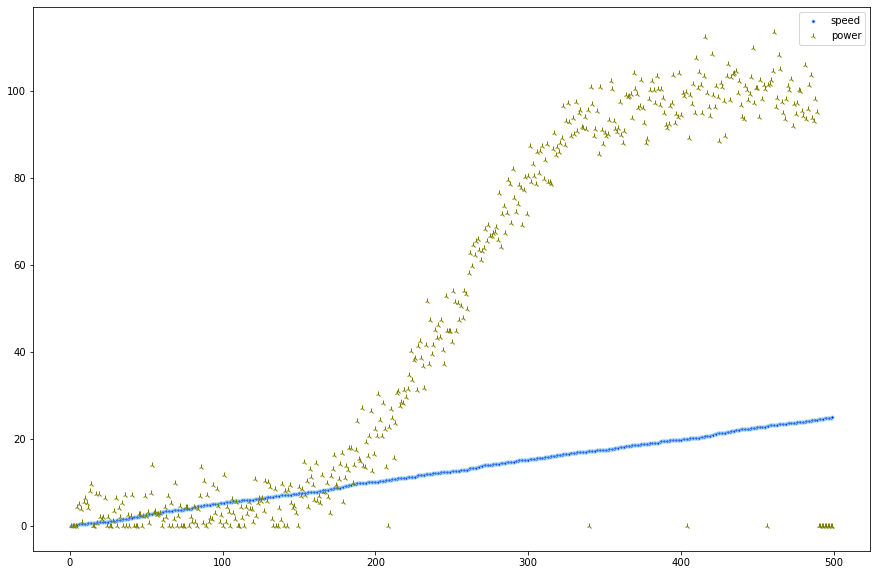

In [3]:
#Plotting dataset initially in its 'raw' form: 

# Matplotlib interactive plots

%matplotlib inline
#resizing
plt.rcParams['figure.figsize']=([15, 10])



#plotting, speed is shown blue dots while power is the green section
plt.plot( 'speed', 'y1', data=powerdata, marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=4)
plt.plot( 'power', 'y2', data=powerdata, marker='2', color='olive', linewidth=4)


plt.legend()

plt.show()

<br>

As seen above and considering my analysis in [Fundamentals-DA project's repository](https://github.com/Ainara12/Fundamentals-Project/blob/master/Fundamentals%20DA-Project.ipynb), I have concluded that this dataset seems to fit in a Polynomial Linear Regression. 

A Polynomial Linear Regression, 

See below an example on how I created the curve that fits this data and found the **R-Squared value** to be very high ( closer to 1). 

In order to apply the polynomial regression to our plot I  am creating a variable that will use **numpy poly1d** and **numpy polyfit** functions to generate this curve to fit the data. 


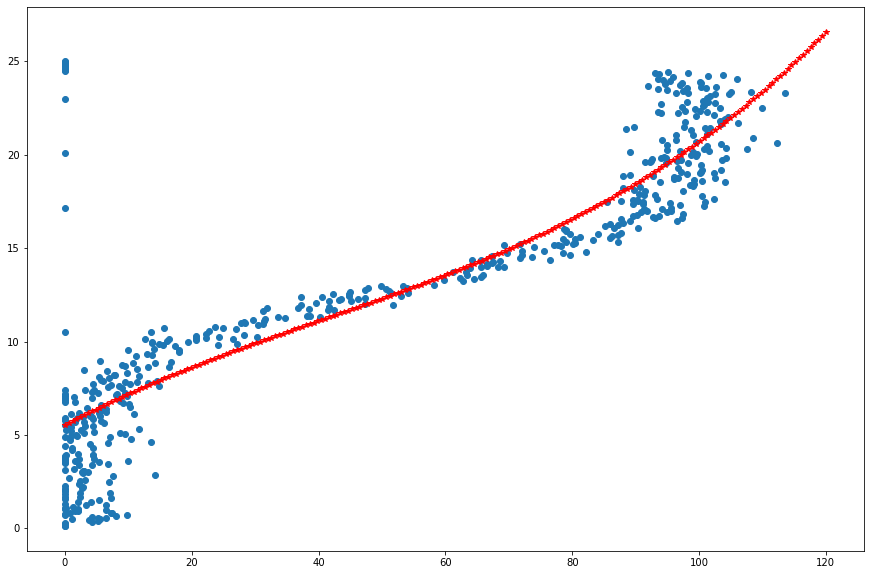

In [5]:
#Applying Polynomial regression to our plot:

#Creating variable with numpy functions

#first I separate the 2 variables to represent them 

power=powerdata['speed']
speed=powerdata['power']


Polynom=np.poly1d(np.polyfit(speed, power,deg=3))

xline=np.linspace(0.0, 120, 200) # creatingand even spaced axis

#plotting these elements with a scatter plot
#resizing
plt.rcParams['figure.figsize']=([15, 10])

plt.scatter( speed, power)# Using scatterplot to represent the two variables 
plt.plot(xline, Polynom(xline), 'r*')#using function to add our xline along wit the result of the poly1d and polyfit functions 

plt.show()


<br> 


Now we calculate **R-squared value** also called **Coefficient of determination** , this value measures how well a regression model fits to the data. We can calculate using the **numpy polyfit function** and then proceed to square this value. This coefficient can be positive or negative. 

**Numpy polyfit function** uses Pearson's correlation coefficient , which differs from the **coefficient of determination** above described as it measures the strength of the linear relationship between 2 sets of observations, in this case how much the output power depends on the wind speed;power output is the dependent variable (*y* value) . It also tells whether the relationship is positive or negative. 

In this case since we have a Polynomial linear regression , I am using **Sklearn** to obtain the **coefficient of determination** .I followed steps found on this [guide](https://www.w3schools.com/python/python_ml_polynomial_regression.asp)

I am describing the process on cell below.


In [6]:
#calculating R-squared value with sklearn

#first, I import sklearn and specific module

from sklearn.metrics import r2_score

#Using r2_score functionality with my previous created variable 'Polynom' 
r2=r2_score(power,Polynom(speed) )

print('The R-squared value is: ',r2)

The R-squared value is:  0.7321827537382541


<br>

### How we interpret the R-squared value? 

The closest a value is to 1 the better fit, in this case with 0.7321827537382541 we have a moderate to very good fit. This implies that most of the changes in the dependent variable or *y* (power) are explained by the corresponding changes in *x* or independent variable (speed).

<br>

## Presenting and training *Model*

In this section I am going to create a model to predict values, based on what we have learn in previous sections about this dataset. 
Once I created the model I will analyse its accuracy. 



<br>

### Presenting model

My model is based on this [guide/tutorial](https://www.w3schools.com/python/python_ml_polynomial_regression.asp) in which after confirming that Polynomial Regression fits the data very well, I use module **r2_score** from **sklearn** in order to predict how much power will be generated from a specific wind speed value. 

In this example we are going to test the model considering that wind speed is :2.179.
Let's see the steps I have taken below and what output power result we obtain: 

In [7]:
#Using my variable Polynom created in previous steps

Polynom=np.poly1d(np.polyfit(speed, power,deg=3))

#I enter the value that I want to find out with this model

Power_generated = Polynom(2.179)

print('This is the amount of power generated considering win speed is 2.179 mph:')
print(Power_generated)

This is the amount of power generated considering win speed is 2.179 mph:
5.912036065122072



<br>

## Experimenting with Keras and Neural networks model 

In this section of the project I am experimenting with sklearn neural networks, following [lecture's tutorials](https://web.microsoftstream.com/video/b3c0a6ba-86b6-4f4a-bc1d-48d26c868bea). 
My intention is again to predict what power output we obtain from an specific wind speed as we tried above using **sklearn r2_score**. 
My main foucs here is to have a portion of the data that will be part of the train model and reach then more accurate results. 
See my attemp below: 

### What is Keras for Machine learning?

Keras for machine learning is source Also using lecturer's videoand Jupyter notebook.


In [8]:
#Now using dataset I am creating a new neural network with two neurons ( one for wind
#speed the other for Power generated )

# using this tutorial: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/


# Neural networks.
import tensorflow.keras as kr

# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 18]


In [9]:
#loading dataset
Powerdataset=pd.read_csv('Powerproduction dataset.csv', delimiter=',')


x=Powerdataset['speed']
y=Powerdataset['power']


In [10]:
#As this dataset fits better a polynomial regression I am trying this approach

f = lambda x: 2.0 * x**2 + 3.0 * x + 4.0

poly = pd.DataFrame()
poly['x'] = Powerdataset['speed']
poly['y'] = poly['x'].apply(f)


In [11]:
# Creating model using sequential
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')#Adjusting learn rate  to 0.001 for more accuracy


In [12]:
# Fit the data.
model.fit(poly['x'], poly['y'], epochs=1000, batch_size=10) # batch_size chooses how many values are going to be send to add the weights



Epoch 1/1000
50/50 [==============================] - 2s 1ms/step - loss: 389032.6409
Epoch 2/1000
50/50 [==============================] - 0s 985us/step - loss: 358677.9344
Epoch 3/1000
50/50 [==============================] - 0s 918us/step - loss: 362366.7126
Epoch 4/1000
50/50 [==============================] - 0s 836us/step - loss: 367846.4062
Epoch 5/1000
50/50 [==============================] - 0s 938us/step - loss: 316763.1906
Epoch 6/1000
50/50 [==============================] - 0s 918us/step - loss: 342733.0674
Epoch 7/1000
50/50 [==============================] - 0s 755us/step - loss: 354171.5699
Epoch 8/1000
50/50 [==============================] - 0s 857us/step - loss: 337436.1553
Epoch 9/1000
50/50 [==============================] - 0s 897us/step - loss: 359890.8441
Epoch 10/1000
50/50 [==============================] - 0s 816us/step - loss: 351254.1023
Epoch 11/1000
50/50 [==============================] - 0s 877us/step - loss: 368263.6630
Epoch 12/1000
50/50 [===========

50/50 [==============================] - 0s 775us/step - loss: 99834.9438
Epoch 185/1000
50/50 [==============================] - 0s 816us/step - loss: 119352.7400
Epoch 186/1000
50/50 [==============================] - 0s 795us/step - loss: 103685.2711
Epoch 187/1000
50/50 [==============================] - 0s 734us/step - loss: 100046.2106
Epoch 188/1000
50/50 [==============================] - 0s 877us/step - loss: 114475.8539
Epoch 189/1000
50/50 [==============================] - 0s 734us/step - loss: 111055.0801
Epoch 190/1000
50/50 [==============================] - 0s 714us/step - loss: 102354.1729
Epoch 191/1000
50/50 [==============================] - 0s 714us/step - loss: 99546.6288
Epoch 192/1000
50/50 [==============================] - 0s 693us/step - loss: 119123.8448
Epoch 193/1000
50/50 [==============================] - 0s 714us/step - loss: 90423.1299
Epoch 194/1000
50/50 [==============================] - 0s 734us/step - loss: 104377.1918
Epoch 195/1000
50/50 [======

50/50 [==============================] - 0s 734us/step - loss: 23065.7126
Epoch 368/1000
50/50 [==============================] - 0s 693us/step - loss: 25536.9192
Epoch 369/1000
50/50 [==============================] - 0s 674us/step - loss: 27964.9364
Epoch 370/1000
50/50 [==============================] - 0s 734us/step - loss: 26840.2029
Epoch 371/1000
50/50 [==============================] - 0s 714us/step - loss: 26689.8749
Epoch 372/1000
50/50 [==============================] - 0s 714us/step - loss: 27008.7852
Epoch 373/1000
50/50 [==============================] - 0s 755us/step - loss: 23533.0412
Epoch 374/1000
50/50 [==============================] - 0s 734us/step - loss: 22011.6641
Epoch 375/1000
50/50 [==============================] - 0s 734us/step - loss: 19908.7187
Epoch 376/1000
50/50 [==============================] - 0s 734us/step - loss: 25678.4576
Epoch 377/1000
50/50 [==============================] - 0s 734us/step - loss: 27866.0973
Epoch 378/1000
50/50 [==============

50/50 [==============================] - 0s 877us/step - loss: 3883.7846
Epoch 553/1000
50/50 [==============================] - 0s 897us/step - loss: 3760.8093
Epoch 554/1000
50/50 [==============================] - 0s 877us/step - loss: 3330.0045
Epoch 555/1000
50/50 [==============================] - 0s 918us/step - loss: 2933.9558
Epoch 556/1000
50/50 [==============================] - 0s 877us/step - loss: 3615.8529
Epoch 557/1000
50/50 [==============================] - 0s 1ms/step - loss: 3832.5365
Epoch 558/1000
50/50 [==============================] - 0s 795us/step - loss: 3759.1116
Epoch 559/1000
50/50 [==============================] - 0s 1ms/step - loss: 4003.5262
Epoch 560/1000
50/50 [==============================] - 0s 999us/step - loss: 3479.4779
Epoch 561/1000
50/50 [==============================] - 0s 959us/step - loss: 4129.5789
Epoch 562/1000
50/50 [==============================] - 0s 938us/step - loss: 3169.5106
Epoch 563/1000
50/50 [=============================

50/50 [==============================] - 0s 897us/step - loss: 1329.9872
Epoch 646/1000
50/50 [==============================] - 0s 979us/step - loss: 881.3464
Epoch 647/1000
50/50 [==============================] - 0s 938us/step - loss: 914.9545
Epoch 648/1000
50/50 [==============================] - 0s 999us/step - loss: 1034.2405
Epoch 649/1000
50/50 [==============================] - 0s 897us/step - loss: 1435.5089
Epoch 650/1000
50/50 [==============================] - 0s 979us/step - loss: 1085.0744
Epoch 651/1000
50/50 [==============================] - 0s 1ms/step - loss: 1402.3885
Epoch 652/1000
50/50 [==============================] - 0s 999us/step - loss: 1042.1147
Epoch 653/1000
50/50 [==============================] - 0s 857us/step - loss: 1062.6852
Epoch 654/1000
50/50 [==============================] - 0s 938us/step - loss: 943.6560
Epoch 655/1000
50/50 [==============================] - 0s 897us/step - loss: 1042.4669
Epoch 656/1000
50/50 [==============================

50/50 [==============================] - 0s 714us/step - loss: 166.0959
Epoch 834/1000
50/50 [==============================] - 0s 775us/step - loss: 164.3014
Epoch 835/1000
50/50 [==============================] - 0s 857us/step - loss: 148.9804
Epoch 836/1000
50/50 [==============================] - 0s 755us/step - loss: 109.6780
Epoch 837/1000
50/50 [==============================] - 0s 714us/step - loss: 107.8175
Epoch 838/1000
50/50 [==============================] - 0s 755us/step - loss: 128.0309
Epoch 839/1000
50/50 [==============================] - 0s 693us/step - loss: 128.6451
Epoch 840/1000
50/50 [==============================] - 0s 673us/step - loss: 146.8557
Epoch 841/1000
50/50 [==============================] - 0s 836us/step - loss: 164.0610
Epoch 842/1000
50/50 [==============================] - 0s 755us/step - loss: 163.6777
Epoch 843/1000
50/50 [==============================] - 0s 693us/step - loss: 133.0244
Epoch 844/1000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 734us/step - loss: 61.1663
Epoch 929/1000
50/50 [==============================] - 0s 1ms/step - loss: 51.9100
Epoch 930/1000
50/50 [==============================] - 0s 795us/step - loss: 80.1765
Epoch 931/1000
50/50 [==============================] - 0s 1ms/step - loss: 55.6800
Epoch 932/1000
50/50 [==============================] - 0s 775us/step - loss: 55.9123
Epoch 933/1000
50/50 [==============================] - 0s 795us/step - loss: 54.4633
Epoch 934/1000
50/50 [==============================] - 0s 816us/step - loss: 38.3265
Epoch 935/1000
50/50 [==============================] - 0s 734us/step - loss: 55.8110
Epoch 936/1000
50/50 [==============================] - 0s 918us/step - loss: 45.6662
Epoch 937/1000
50/50 [==============================] - 0s 836us/step - loss: 55.2141
Epoch 938/1000
50/50 [==============================] - 0s 755us/step - loss: 66.0922
Epoch 939/1000
50/50 [==============================] - 0s 755us/step - l

In [ ]:
#Now we plot the result showing in red for actual and blue for the prediction obtained

#resizing
plt.rcParams['figure.figsize']=([15, 10])

xline=np.linspace(0.00,1,100)

plt.plot(xline)
plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')
plt.legend();


In [ ]:
#making predictions using this model:

# Let's prepare the model to receive new instances ( new values for wind speed)which are unknown for the model:
Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
Xnew = scalarX.transform(Xnew)

# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs

for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

<br>

Now I am using the same method than lecturer to evaluate if this model is working as intended to predict the 'y' values. 

In [ ]:
#we can take a sample of values and see the predictions

model.predict([1.0,2.0,3.0,4.0])


In [ ]:
#now I use this piece of code to see what 'f' says the values are

np.array([[f(i)] for i in [1.0, 2.0, 3.0, 4.0]])



<br> 

### Conclusion about this Model

After plotting the results  and evaluate the model as in the cells direcly above this one, we can see that the model is not working 100% although based on the (talk about laminar flow and turbulent when find good references) and the prediction does not seem to be accurate to what we could expect to happen with the power output. 
In this case we haven't trained the data. 

<br>

## Using a different approach with Keras

Let's try a different approach next , training our data. 
I am using this[tutorial](https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/) as reference.
See steps below.

- First I import the necessary 'Sklearn' modules to split the data into training and test sets.
- I import 'Tensorflow keras layers' and 'Tensorflow keras models' to create and train the model.

In [13]:
#First I import the needed modules to divide dataset into training and 
#test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model


<br>

- Next step is to create the model using 'Sequential'. There are two ways to build Keras models ( Functional and Sequential) and in this case I am using same way as the tutorial as this is a simplest type of model, with a linear stock of layers. For this dataset I think is enough to use Sequential. 


In [14]:
#Creating model

model = kr.models.Sequential()
model.add(kr.layers.Dense(2, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')#Adjusting learn rate  to 0.001 for more accuracy


<br> 

In the next step we are training the model, I selected batch size 10 which means the model will pass 10 values everytime and an epoch of 500.

In [62]:
#training model

history= power_model = model.fit(x_train, y_train, batch_size=10, epochs=1000, verbose=1, validation_split=0.2)

Epoch 1/1000
32/32 [==============================] - 0s 4ms/step - loss: 242.0819 - val_loss: 243.7709
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 242.0652 - val_loss: 243.7523
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 242.0866 - val_loss: 243.6749
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 242.0461 - val_loss: 243.7570
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 242.1178 - val_loss: 243.7638
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 242.0587 - val_loss: 243.7550
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 242.0300 - val_loss: 243.6990
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: 242.0920 - val_loss: 243.7663
Epoch 9/1000
32/32 [==============================] - 0s 3ms/step - loss: 242.0689 - val_loss: 243.6947
Epoch 10/1000
32/32 [==============================] - 0s 3ms/st

32/32 [==============================] - 0s 2ms/step - loss: 241.8794 - val_loss: 243.5040
Epoch 80/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.9237 - val_loss: 243.4711
Epoch 81/1000
32/32 [==============================] - 0s 3ms/step - loss: 242.0048 - val_loss: 243.5267
Epoch 82/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.8558 - val_loss: 243.5574
Epoch 83/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.9003 - val_loss: 243.5539
Epoch 84/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.8814 - val_loss: 243.5215
Epoch 85/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.8525 - val_loss: 243.5165
Epoch 86/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.9863 - val_loss: 243.5087
Epoch 87/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.8486 - val_loss: 243.4850
Epoch 88/1000
32/32 [==============================] - 0s 2ms/step - 

32/32 [==============================] - 0s 2ms/step - loss: 241.6136 - val_loss: 243.1647
Epoch 234/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.6182 - val_loss: 243.2730
Epoch 235/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.5919 - val_loss: 243.2878
Epoch 236/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.6013 - val_loss: 243.1536
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.6982 - val_loss: 243.2284
Epoch 238/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.6464 - val_loss: 243.1421
Epoch 239/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.5814 - val_loss: 243.2765
Epoch 240/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.6235 - val_loss: 243.2052
Epoch 241/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.6575 - val_loss: 243.2117
Epoch 242/1000
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 3ms/step - loss: 241.4193 - val_loss: 242.9169
Epoch 388/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.3862 - val_loss: 242.9531
Epoch 389/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.3936 - val_loss: 242.9224
Epoch 390/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.3732 - val_loss: 242.9977
Epoch 391/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.4955 - val_loss: 242.8772
Epoch 392/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.4478 - val_loss: 243.0328
Epoch 393/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.4094 - val_loss: 242.9591
Epoch 394/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.4286 - val_loss: 242.9416
Epoch 395/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.4172 - val_loss: 242.9331
Epoch 396/1000
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 3ms/step - loss: 241.2655 - val_loss: 242.8320
Epoch 542/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.2449 - val_loss: 242.7485
Epoch 543/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2810 - val_loss: 242.7180
Epoch 544/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2465 - val_loss: 242.7477
Epoch 545/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2537 - val_loss: 242.7888
Epoch 546/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2367 - val_loss: 242.7689
Epoch 547/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2545 - val_loss: 242.7713
Epoch 548/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2328 - val_loss: 242.7813
Epoch 549/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2500 - val_loss: 242.7590
Epoch 550/1000
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 241.2126 - val_loss: 242.6311
Epoch 696/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.1788 - val_loss: 242.6107
Epoch 697/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.1424 - val_loss: 242.6567
Epoch 698/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.1916 - val_loss: 242.6247
Epoch 699/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.1563 - val_loss: 242.6716
Epoch 700/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.1244 - val_loss: 242.5653
Epoch 701/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.1893 - val_loss: 242.5995
Epoch 702/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2007 - val_loss: 242.6976
Epoch 703/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.1794 - val_loss: 242.5459
Epoch 704/1000
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 3ms/step - loss: 241.0698 - val_loss: 242.5018
Epoch 850/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.0751 - val_loss: 242.4607
Epoch 851/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.0893 - val_loss: 242.4405
Epoch 852/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.0794 - val_loss: 242.5022
Epoch 853/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.0997 - val_loss: 242.5234
Epoch 854/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.1041 - val_loss: 242.4404
Epoch 855/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.1088 - val_loss: 242.4048
Epoch 856/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.1181 - val_loss: 242.5406
Epoch 857/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.1031 - val_loss: 242.4138
Epoch 858/1000
32/32 [==============================] - 0s 3m

<br>

Now we plot the result. And can see that the result changes as the model learn everytime. 

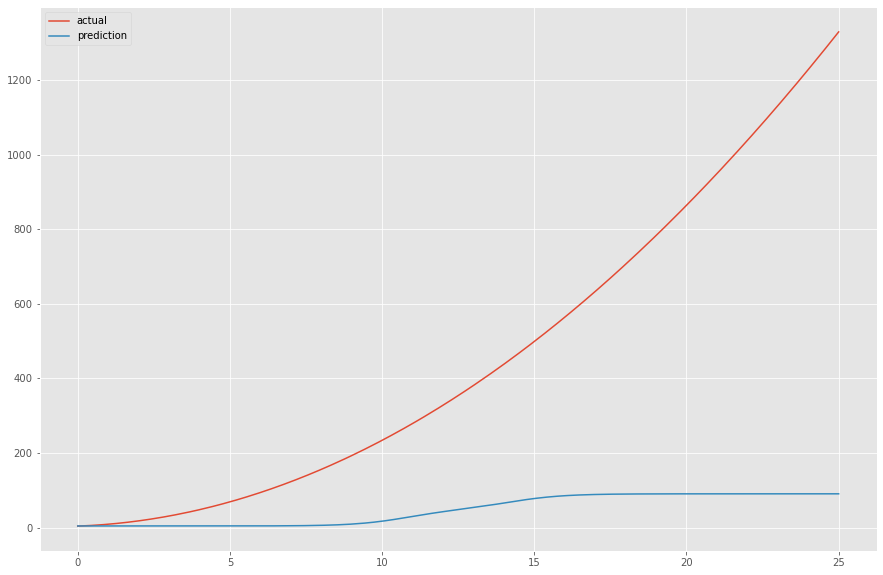

In [65]:
#plotting results

#resizing
plt.rcParams['figure.figsize']=([15, 10])

plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')

plt.legend()

In [37]:
#checking History object to see record of the loss values 
#of the loss values and metric values during training 

'''Source:https://www.tensorflow.org/guide/keras/train_and_evaluate '''

history.history

{'loss': [255.7317657470703,
  255.66738891601562,
  255.6270751953125,
  255.5767059326172,
  255.543212890625,
  255.4953155517578,
  255.50564575195312,
  255.6455078125,
  255.4529266357422,
  255.3940887451172,
  255.3307647705078,
  255.2576141357422,
  255.235107421875,
  255.18881225585938,
  255.2179412841797,
  255.13980102539062,
  255.10055541992188,
  255.04690551757812,
  255.0323944091797,
  255.01425170898438,
  255.06802368164062,
  254.8907470703125,
  254.889892578125,
  254.9031219482422,
  254.86660766601562,
  254.8036346435547,
  254.7381591796875,
  254.6851806640625,
  254.6568145751953,
  254.69412231445312,
  254.59811401367188,
  254.6470947265625,
  254.55783081054688,
  254.4859619140625,
  254.4607391357422,
  254.39517211914062,
  254.3976593017578,
  254.33456420898438,
  254.3268280029297,
  254.2531280517578,
  254.2918701171875,
  254.19400024414062,
  254.184814453125,
  254.11911010742188,
  254.0977325439453,
  254.0809326171875,
  254.04391479492

In [71]:
# Making predictions with this model:


prediction=model.predict([4.0,0.234])

print('This is the amount of power generated for the wind speed you have provided:')
print(prediction)

This is the amount of power generated for the wind speed(s) you have provided:
[[4.3476424]
 [4.3300843]]


<br>

Again, to evaluate this model. I use the method shown in this tutorial, which is the root mean squared error method. 
This method consist of  he square root of the mean of the square of all of the error. 

In [24]:
#Evaluating the performance of a regression model on test set using 
#root mean squared error method

from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))


15.996012304201834
17.039363794649415


<br>

### Conclusion about this model

Looking at the shape that the prediction is creating it seems that this prediction model is more accurate.
Cosidering the evaluation method we have performed in the markdown cell above using root mean squared error, we can see that both the train and the set model are performing good as they both give similar values. 
In cases where for example, the train model is performing better than the test model we talk about 'overfitting'. 
'Overfitting' means that the model has an excessively complex structure and learns both the existing relations among data and noise. On the other hand 'Underfitting'is often the consequence of model being unable to encapsulate the relations among data.
[source](https://realpython.com/train-test-split-python-data/#underfitting-and-overfitting).




<br> 

## Creating *Model* using Sklearn

After my approaches made in previous sections, I have decided to use one last approach with module 'Sklearn'. Using Keras and Tensorflow to cerate ad trai models using this dataset have been good practice since I have never used this before and for sure I will keep learning about it. 
I would like now to use this model for linear regression using [this tutorial]() which I think it might be easier and more accurate to make predictions as my model to be included on the second  part of this project which is the web service which will be encapsulated into my Dockerfile ( review this text after completion). 

I will provide details of the process in markdown and code cells below: 

In [91]:
#First we import the modules we are going to use
from sklearn.linear_model import LinearRegression #import linear regression model
from sklearn.model_selection import train_test_split #to divide data

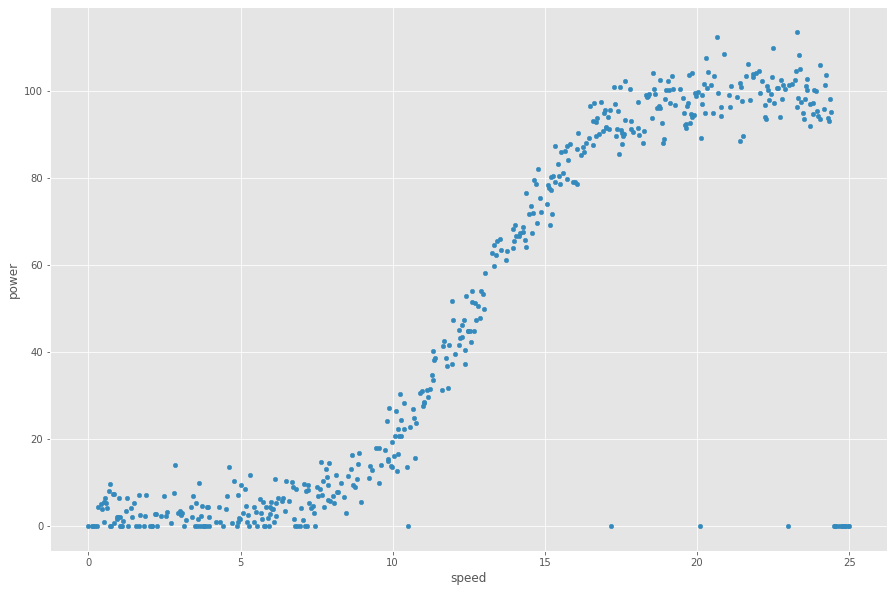

In [92]:
#loading data in this section for better understanding

Powerdataset=pd.read_csv('Powerproduction dataset.csv', delimiter=',')


x=Powerdataset['speed']
y=Powerdataset['power']

#plotting dataset to have this included on this section: 

Powerdataset.plot(kind='scatter', x= 'speed', y='power')

plt.show()



In [93]:
#Let's create our linear regression model
#doing test train split

X_train, X_test, y_train, y_test= train_test_split(Powerdataset.speed, Powerdataset.power)


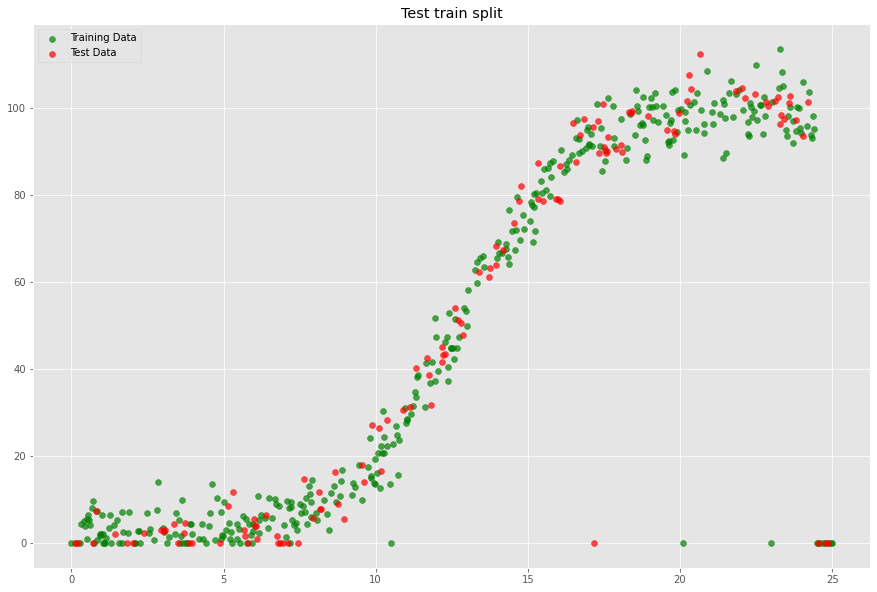

In [94]:
#Let's see how this split looks

plt.scatter(X_train, y_train, label='Training Data', color='g', alpha=.7)
plt.scatter(X_test, y_test, label='Test Data', color= 'r', alpha=.7)
plt.legend()

plt.title('Test train split')

plt.show()

<br> 

Once we have our data split so one part is ised for training and the other part is used for testing, as we can see in the visualization above this cell, we move onto the Model creation section.

In [95]:
#Model creation
#naming model LR as Linear Regression as in the tutorial for 
#easier understanding

LR=LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)#Adding x_train and y_train values and reshaping X_train values as they need to be in
#a 1d shape for this to work 

LinearRegression()

<br> 

The next step is to use the model to predict in out test data. See below:

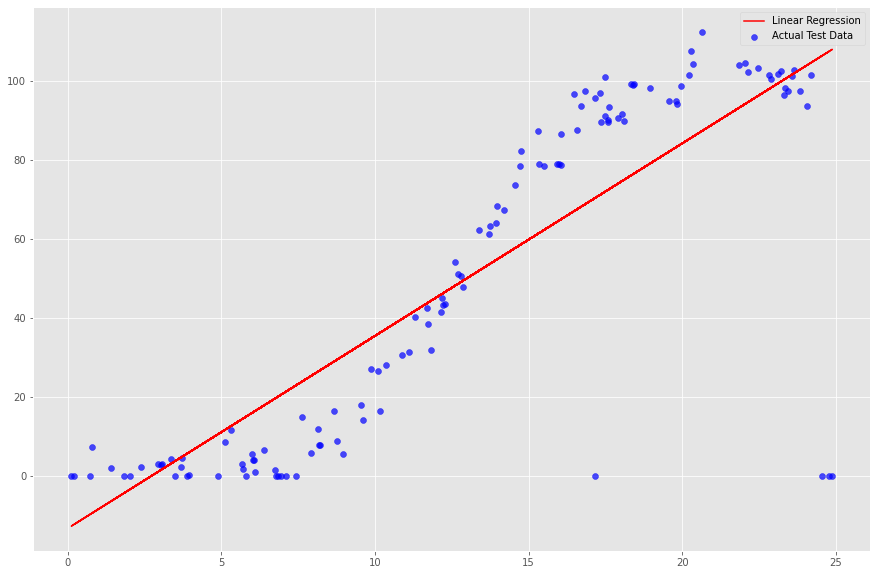

In [96]:
# Predicting

prediction=LR.predict(X_test.values.reshape(-1,1))

#Plotting X_test against prediction results in same plot
plt.plot(X_test, prediction, label='Linear Regression', color='r')
plt.scatter(X_test, y_test, label='Actual Test Data', color='b', alpha=.7)
plt.legend()

plt.show()


<br>

As seen in previous sections where we found the **R squared value** for Simple Linear regression model used on this dataset is  0.531347729791333, which is a low to moderate fit. 
Let's try this model to predict the power output based on the wind speed values we enter as input on our model. 

 


In [97]:
#Making predictions for specific values
#using command predict we enter a sample wind speed: 

print('This is the power generated considering your input: ')
LR.predict(np.array([[25.00]]))[0]


This is the power generated considering your input: 


108.55336482878687

<br> 

We can see that the power generated result we received is the same as the power result we can see in our plot above. The model seems to be accurate enough.
Finally we will 'Sklearn' score function to evaluate this model's accuracy. 


In [98]:
#score function

LR.score(X_test.values.reshape(-1,1),y_test.values)

0.7007989191219558

<br>

Considering the maximum score is 1.0, this does not seem a bad model to fit in this dataset. 